**Background**:

An accurate, personalized recommendation system can improve business and sales and build customer satisfaction.


**Types of Recommendation Engines**:
1. **Recommend the most popular items aka popularity model (Method 1)**
    - Recommend the items which are liked by most number of users
    - Pros:
        - Fast
    - Cons:
        - No personalization bc popularity is defined by the user pool
    - Works because
        - There is a division by section so user can look at the section
        - Making a good classier will become exponentially difficult as the number of users and items grow
2. **Using a classifier to make recommendation**
    - Classifiers are parametric solutions that require some parameters of the user and item to be defined first
    - Pros:
        - Incorporates personalization
        - Works even if the user's past history is short or not available
    - Cons:
        - Features might not be availalbe or sufficient to create a good classifier
        - Making a good classifier will become exponentially difficult as the number of user and items grow
3. **Recommendation algorithms**
    - **Content-based filtering (Method 2)**
        - Idea: if you like an item then you will also like a similar item
        - Based on similarity of the items being recommended
        - Works well when it is easy to determine the context/properties of each item, ie song or movie recommendation
        - User profile is generated from the data provided by the user either explicitly (ratings) or implicitly (clicking on the link)
        - The more inputs from users, the more accurate the recommender
    - **Memory-based collaborative filtering (Method 3)**
        - **Find similar items based on a similarity or correlation coefficient and take the weighted average of ratings**
        - Idea: if person A likes items 1, 2, 3 and B likes 2, 3, 4 then they have similar interests and A should like item 4 and B should like item 1
        - Based on the past behavior and not on the context which makes it one of the most commonly used algorithm bc it does not depend on any additional information
        - No training or optimization is involved so they are easy to use
        - Performance decreases when data is sparse which hinders scalability of these approaches for most of the real-world problems
        - Does not use 
        - **Advantages**:
            - Easy to create
            - Easy to interpret and explain results
        - **Disadvantages**:
            - Performance reduces when data is sparse
            - Non-scalable
        - Types of memory-based collaborative filtering algorithms:
            1. **User-user collaborative filtering**
                - Find look-alike customers based on similarity and offer products which first customer's look alike has chosen in the past
                - Effective but time and resource consuming
                - Need to compute every customer pair information
            2. **Item-item collaborative filtering**
                - Similar to user-user collaborative filtering but find item look alikes
                - Recommend alike items to customers who have purchased any item from the store
                - Less resource and time consuming
                - Item-item matrix is fixed over time with fixed number of products
    - **Model-based collaborative filtering**
        - **Uses parametric machine learning to find user ratings of unrated items**
        - Examples: PCA, SVD, Neural Nets, Matrix Factorization
        - Learns parameters using gradient descent or other optimization algorithms
        - **Advantages**:
            - Dimensionality reduction handles sparse/missing data
        - **Disadvantages**:
            - Inference is intracable because factors are hidden/latent
        - Types of model-based collaborative filtering algorithms:
            1. **Matrix Factorization Based**
                1. **Singular Vector Decomposition (Method 3)**
                    - Reduces the dimension of the dataset
                    - Gives low-rank approximation of user tastes and preferences
                    - Need to extract user preferences that can be determined by a small number of hidden factors called **embeddings**
                    - **Embeddings** are low dimensional hidden factors for items and users
                    - Python packages for implementation: surprise
                2. **Probabilitistic Matrix Factorization**
                    - Python packages for implementation: fastai
                3. **Non -ve Matrix Factorization**
                    - Python packages for implementation: surprise
            2. **Deep learning/neural network (Method 4)**
                - Does not need to decompose original sparse matrix into a product of 2 low rank orthogonal matrices like in SVD
                - Learns the values of embedding matrix itself
                - User and item latenet features are looked up from the embedding matrices for specific movie-user combination which are the input values for further linear and non-linear layers
                - Passing this input to multiple relu, linear, or sigmoid layers to learn the corresponding weights by any optimization algorithm
                - Python packages for implementation: fastai

(https://medium.com/@james_aka_yale/the-4-recommendation-engines-that-can-predict-your-movie-tastes-bbec857b8223)

**Data**: (https://grouplens.org/datasets/movielens/10m/)

We will be using the online movie recommender service MovieLens' dataset collected from the MovieLens website. The datasets were collected over several periods of time.
Users were selected at random to be included in the data. All users have rated 20+ movies. No demographic information is included.

The data includes:
- 100K ratings (1-5) from 1000 users on 1700 movies
- Each user has rated 20+ movies
- Simple demographic information for the users, such as gender, age, occupation, zip, etc.
- Genre information of movies

### **Because we are using GraphLab to build the recommendation system, we need to first follow the installation instructions which is found here (https://turi.com/download/install-graphlab-create-command-line.html) before importing it. Also, GraphLab is only compatible with Python version 2.7 and pip versions >= 7.**

**In addition we will be using the Surprise library, a Python scikit building and analyzing recommender systems.**

In [1]:
import pandas as pd
import numpy as np
import scipy as sc

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# Load Data

## Users Data

In [2]:
cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('ml-100k/u.user', sep='|', names=cols)
print(users.shape)
users.head()

(943, 5)


,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [3]:
users.to_pickle('users.pickle')

**There are 943 users with 5 features, 4 of which are demographic information: unique ID, age, sex, occupation, and zipcode.**

## Ratings Data

In [2]:
cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=cols)
print(ratings.shape)
ratings.head()

(100000, 4)


,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [3]:
ratings.to_pickle('ratings.pickle')

**There are 100k observations in the ratings dataset and 4 features: unique user ID, unique movie ID, rating given by the specific user for the respective movie, and a timestamp of the rating. There are more movie ratings than users and movies because users selected for this dataset have to have rated at least 20 movies.**

## Movies Data

In [12]:
cols = ['movie_id', 'movie_title', 'release_date', 'video_release_date', 'imdb_url', 'unknown', 'action',
        'adventure', 'animation', 'childrens', 'comedy', 'crime', 'documentary', 'drama', 'fantasy',
        'film_noir', 'horror', 'musical', 'mystery', 'romance', 'sci_fi', 'thriller', 'war', 'western']
movies = pd.read_csv('ml-100k/u.item', sep='|', names=cols, encoding='latin-1')
print(movies.shape)
movies.head()

(1682, 24)


,movie_id,movie_title,release_date,video_release_date,imdb_url,unknown,action,adventure,animation,childrens,comedy,crime,documentary,drama,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


**There are 1682 movies and 24 features, the last 18 of which are the different genres that are one hot encoded for us already.**

In [13]:
genres = pd.read_csv('ml-100k/u.genre', sep='|', names=['genre', 'index'])
genres = genres['genre'].tolist()
genres

['unknown',
 'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

**This is the list of movie genres included in our downloaded package.**

**Let's add a new column `genres` of the combined genres for each movie by reversing the one-hot encoded genre data.**

In [14]:
movies['genres'] = ''

for col_name in movies.ix[:, 5:].columns:
    movies.ix[movies[col_name]==1, 'genres'] = movies['genres'] + '|' + col_name
    
movies['genres'] = [i[1:] for i in movies['genres']]
movies.head()

,movie_id,movie_title,release_date,video_release_date,imdb_url,unknown,action,adventure,animation,childrens,comedy,crime,documentary,drama,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western,genres
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,animation|childrens|comedy
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,action|adventure|thriller
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,thriller
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,action|comedy|drama
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,crime|drama|thriller


In [15]:
movies.to_pickle('movies.pickle')

In [7]:
occupation = pd.read_csv('ml-100k/u.occupation', sep='|', names=['occupation'])
occupation = occupation['occupation'].tolist()
print(len(occupation))
occupation

21


['administrator',
 'artist',
 'doctor',
 'educator',
 'engineer',
 'entertainment',
 'executive',
 'healthcare',
 'homemaker',
 'lawyer',
 'librarian',
 'marketing',
 'none',
 'other',
 'programmer',
 'retired',
 'salesman',
 'scientist',
 'student',
 'technician',
 'writer']

**There are 21 occupation categories, two of which are "none" and "other".**

## Combined Data

In [8]:
data = users.merge(ratings, on='user_id').merge(movies, on='movie_id')
data.head()

,user_id,age,sex,occupation,zip_code,movie_id,rating,timestamp,movie_title,release_date,video_release_date,imdb_url,unknown,action,adventure,animation,childrens,comedy,crime,documentary,drama,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western,genres
0,1,24,M,technician,85711,61,4,878542420,Three Colors: White (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Trzy%20kolory...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,drama
1,13,47,M,educator,29206,61,4,882140552,Three Colors: White (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Trzy%20kolory...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,drama
2,18,35,F,other,37212,61,4,880130803,Three Colors: White (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Trzy%20kolory...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,drama
3,58,27,M,programmer,52246,61,5,884305271,Three Colors: White (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Trzy%20kolory...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,drama
4,59,49,M,educator,08403,61,4,888204597,Three Colors: White (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Trzy%20kolory...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,drama


**This new dataframe data is the users, ratings, and movies dataframes all merged together on their `user_id`s and `movie_id`s.**

# Clean and Understand the Data

In [9]:
print('The MovieLens data contains {} observations and {} features.'.format(data.shape[0], data.shape[1]))

The MovieLens data contains 100000 observations and 32 features.


In [10]:
data.dtypes

user_id                 int64
age                     int64
sex                    object
occupation             object
zip_code               object
movie_id                int64
rating                  int64
timestamp               int64
movie_title            object
release_date           object
video_release_date    float64
imdb_url               object
unknown                 int64
action                  int64
adventure               int64
animation               int64
childrens               int64
comedy                  int64
crime                   int64
documentary             int64
drama                   int64
fantasy                 int64
film_noir               int64
horror                  int64
musical                 int64
mystery                 int64
romance                 int64
sci_fi                  int64
thriller                int64
war                     int64
western                 int64
genres                 object
dtype: object

**The datatype of the movie genre columns are integers (int64) because they have been one hot encoded except that some movies can have more than one genre, denoted by (1) in the appropriate genre column.**

In [11]:
data.isnull().sum()

user_id                    0
age                        0
sex                        0
occupation                 0
zip_code                   0
movie_id                   0
rating                     0
timestamp                  0
movie_title                0
release_date               9
video_release_date    100000
imdb_url                  13
unknown                    0
action                     0
adventure                  0
animation                  0
childrens                  0
comedy                     0
crime                      0
documentary                0
drama                      0
fantasy                    0
film_noir                  0
horror                     0
musical                    0
mystery                    0
romance                    0
sci_fi                     0
thriller                   0
war                        0
western                    0
genres                     0
dtype: int64

**Since `video_release_date` is missing for all 100k observations, we can drop this column because there is no useful information at all.**

In [12]:
data = data.drop('video_release_date', axis=1)

**And since the `release_date` seems to be the year in the `movie_title` appended to "01-Jan", we can perhaps just format `release_date` as the year from `movie_title`.**

In [13]:
data[~data['release_date'].str.contains('01-Jan-', na=False)]

,user_id,age,sex,occupation,zip_code,movie_id,rating,timestamp,movie_title,release_date,imdb_url,unknown,action,adventure,animation,childrens,comedy,crime,documentary,drama,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western,genres
1033,1,24,M,technician,85711,117,3,874965739,"Rock, The (1996)",07-Jun-1996,"http://us.imdb.com/M/title-exact?Rock,%20The%2...",0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,action|adventure|thriller
1034,6,42,M,executive,98101,117,2,883599431,"Rock, The (1996)",07-Jun-1996,"http://us.imdb.com/M/title-exact?Rock,%20The%2...",0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,action|adventure|thriller
1035,13,47,M,educator,29206,117,3,882398138,"Rock, The (1996)",07-Jun-1996,"http://us.imdb.com/M/title-exact?Rock,%20The%2...",0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,action|adventure|thriller
1036,17,30,M,programmer,06355,117,3,885272724,"Rock, The (1996)",07-Jun-1996,"http://us.imdb.com/M/title-exact?Rock,%20The%2...",0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,action|adventure|thriller
1037,22,25,M,writer,40206,117,4,878887869,"Rock, The (1996)",07-Jun-1996,"http://us.imdb.com/M/title-exact?Rock,%20The%2...",0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,action|adventure|thriller
1038,24,21,F,artist,94533,117,4,875246216,"Rock, The (1996)",07-Jun-1996,"http://us.imdb.com/M/title-exact?Rock,%20The%2...",0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,action|adventure|thriller
1039,26,49,M,engineer,21044,117,3,891351590,"Rock, The (1996)",07-Jun-1996,"http://us.imdb.com/M/title-exact?Rock,%20The%2...",0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,action|adventure|thriller
1040,28,32,M,writer,55369,117,4,881957002,"Rock, The (1996)",07-Jun-1996,"http://us.imdb.com/M/title-exact?Rock,%20The%2...",0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,action|adventure|thriller
1041,32,28,F,student,78741,117,3,883717555,"Rock, The (1996)",07-Jun-1996,"http://us.imdb.com/M/title-exact?Rock,%20The%2...",0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,action|adventure|thriller
1042,37,23,M,student,55105,117,4,880915674,"Rock, The (1996)",07-Jun-1996,"http://us.imdb.com/M/title-exact?Rock,%20The%2...",0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,action|adventure|thriller


**Oops, turns out I was wrong -- `release_date` contains dates other than January 1, so we'll leave it.**

**Let's look at the 9 missing entries for `release_date` and see if we can populate it with the date in the `movie_title`.**

In [14]:
data[data['release_date'].isnull()]

,user_id,age,sex,occupation,zip_code,movie_id,rating,timestamp,movie_title,release_date,imdb_url,unknown,action,adventure,animation,childrens,comedy,crime,documentary,drama,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western,genres
16750,1,24,M,technician,85711,267,4,875692955,unknown,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,unknown
16751,5,33,F,other,15213,267,4,875635064,unknown,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,unknown
16752,130,20,M,none,60115,267,5,875801239,unknown,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,unknown
16753,268,24,M,engineer,19422,267,3,875742077,unknown,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,unknown
16754,297,29,F,educator,98103,267,3,875409139,unknown,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,unknown
16755,319,38,M,programmer,22030,267,4,875707690,unknown,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,unknown
16756,422,26,M,entertainment,94533,267,4,875655986,unknown,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,unknown
16757,532,20,M,student,92705,267,3,875441348,unknown,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,unknown
16758,833,34,M,writer,90019,267,1,875655669,unknown,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,unknown


**There's no title, release date, or imdb url for the movie with the `movie_id` 267 and the movie genre is unknown. Since these entries contain important information such as the users' ratings, demographics, etc., we'll keep these rows for now but let's populate it with the word `unknown`.**

In [15]:
data['release_date'] = data['release_date'].fillna('unknown')

**Let's look at which other movies are missing an imdb url besides `movie_id` 267.**

In [16]:
data[data['imdb_url'].isnull()]

,user_id,age,sex,occupation,zip_code,movie_id,rating,timestamp,movie_title,release_date,imdb_url,unknown,action,adventure,animation,childrens,comedy,crime,documentary,drama,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western,genres
16750,1,24,M,technician,85711,267,4,875692955,unknown,unknown,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,unknown
16751,5,33,F,other,15213,267,4,875635064,unknown,unknown,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,unknown
16752,130,20,M,none,60115,267,5,875801239,unknown,unknown,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,unknown
16753,268,24,M,engineer,19422,267,3,875742077,unknown,unknown,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,unknown
16754,297,29,F,educator,98103,267,3,875409139,unknown,unknown,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,unknown
16755,319,38,M,programmer,22030,267,4,875707690,unknown,unknown,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,unknown
16756,422,26,M,entertainment,94533,267,4,875655986,unknown,unknown,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,unknown
16757,532,20,M,student,92705,267,3,875441348,unknown,unknown,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,unknown
16758,833,34,M,writer,90019,267,1,875655669,unknown,unknown,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,unknown
98849,181,26,M,executive,21218,1359,1,878962200,Boys in Venice (1996),24-Sep-1996,NaN,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,drama


**The movies "Boys in Venice" and "The Deadly Cure" don't have urls but have `release_date`s and the genre is not "unknown". When searching for these movie names and release years in Google, I yield no results. The names of these movies might be wrong or (re)named differently; hence, we can't find them on Google or IMDB. If they did exist, we can webscrape and get the urls from IMDB's site. Again, we'll populate the missing URLs with "unknown".**

In [17]:
data['imdb_url'] = data['imdb_url'].fillna('unknown')

# Exploratory Data Analysis

## Ratings Distribution

In [18]:
rating_dist = data['rating'].value_counts().reset_index(name='count')
rating_dist['perc'] = rating_dist['count']/rating_dist['count'].sum()
rating_dist

,index,count,perc
0,4,34174,0.34174
1,3,27145,0.27145
2,5,21201,0.21201
3,2,11370,0.11370
4,1,6110,0.06110


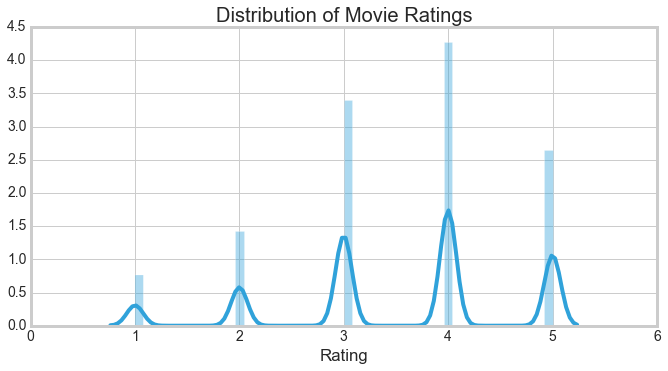

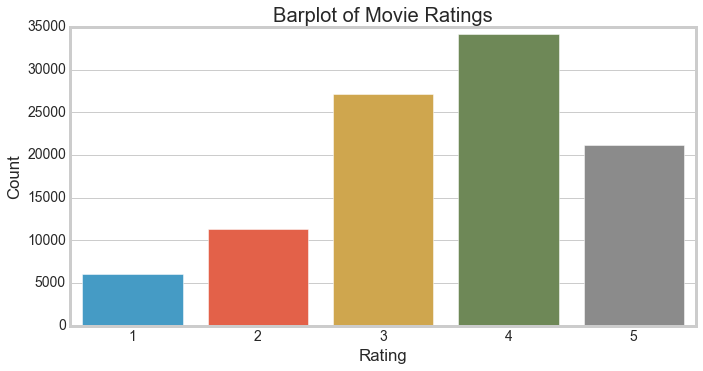

In [19]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
sns.distplot(data['rating'])
plt.xlabel('Rating')
plt.title('Distribution of Movie Ratings')
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(rating_dist['index'], rating_dist['count'])
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Barplot of Movie Ratings')

In [20]:
print('The mean rating is {}.'.format(data['rating'].mean()))

The mean rating is 3.52986.


**A lot of users are very generous in their ratings. The mean rating is 3.53 on a scale from 1 to 5. About a third of the ratings are 4s. Movie ratings and preferences are very subjective and differ from person to person.**

## Number of Ratings by User

In [21]:
user_ratings = data.groupby('user_id').agg({'rating': {'avg_rating': 'mean'}, 'age': {'num_rating': 'count'}})
user_ratings.columns = user_ratings.columns.droplevel(0)
user_ratings = user_ratings.reset_index()
print('The minimum number of movies a user rated is {}, and the maximum is {}.'.format(user_ratings['num_rating'].min(),
                                                                                       user_ratings['num_rating'].max()))
print('The minimum average rating for a user is {} and the maximum is {}.'.format(user_ratings['avg_rating'].min(),
                                                                                  user_ratings['avg_rating'].max()))
user_ratings.head()

The minimum number of movies a user rated is 20, and the maximum is 737.
The minimum average rating for a user is 1.49195402299 and the maximum is 4.86956521739.


,user_id,avg_rating,num_rating
0,1,3.610294,272
1,2,3.709677,62
2,3,2.796296,54
3,4,4.333333,24
4,5,2.874286,175


**All users have rated at least 20 movies, with the maximum number of movies rated as 737.**

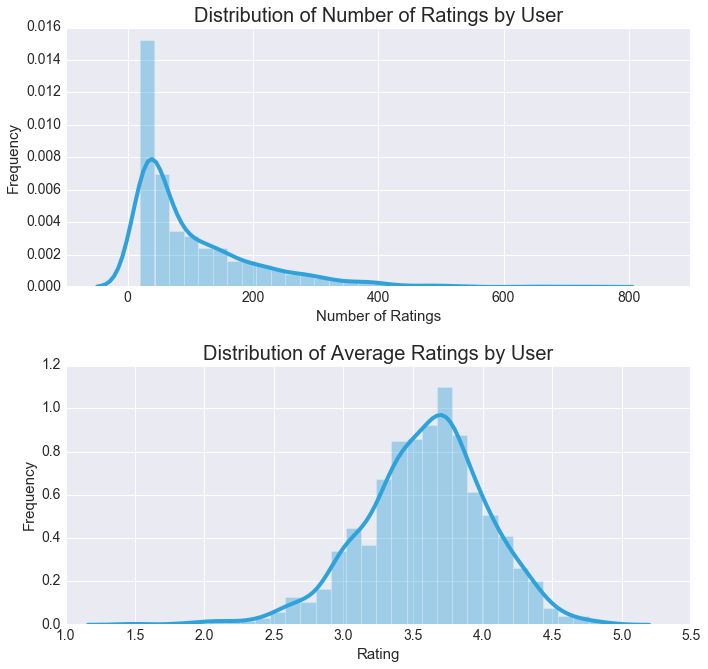

In [22]:
sns.set_style('darkgrid')
f, ax = plt.subplots(2, 1, figsize=(10, 10))
plt.subplots_adjust(hspace=0.3)

ax1 = sns.distplot(user_ratings['num_rating'], ax=ax[0])
ax1.set_title('Distribution of Number of Ratings by User', fontsize=20)
ax1.set_xlabel('Number of Ratings', fontsize=15)
ax1.set_ylabel('Frequency', fontsize=15)

ax2 = sns.distplot(user_ratings['avg_rating'], ax=ax[1])
ax2.set_title('Distribution of Average Ratings by User', fontsize=20)
ax2.set_xlabel('Rating', fontsize=15)
ax2.set_ylabel('Frequency', fontsize=15)

**The number of ratings per user is right skewed with a majority of users having 200 or less ratings. There seems to a peak at 20 ratings per user, which is the minimum number of movie ratings a user can have in order to be included in this dataset. On the other hand, the distribution of the rating scores is more normally distributed with a population mean of about 3.7.**

## Ratings Distribution by Movie

In [23]:
movie_rating = data.groupby('movie_title').agg({'rating': {'avg_rating': 'mean'}, 
                                                'age': {'num_rating': 'count'}}).reset_index()
movie_rating.columns = movie_rating.columns.droplevel(0)
movie_rating.head()

,,avg_rating,num_rating
0,'Til There Was You (1997),2.333333,9
1,1-900 (1994),2.600000,5
2,101 Dalmatians (1996),2.908257,109
3,12 Angry Men (1957),4.344000,125
4,187 (1997),3.024390,41


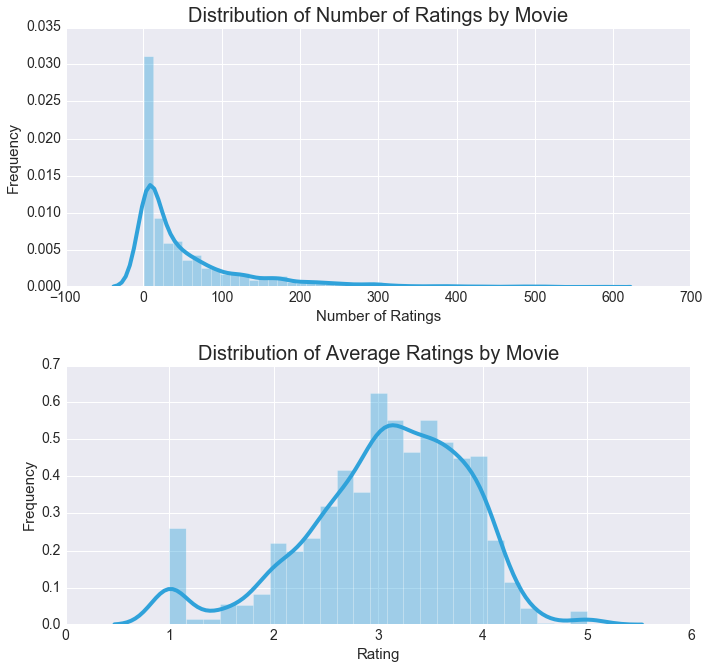

In [24]:
sns.set_style('darkgrid')
f, ax = plt.subplots(2, 1, figsize=(10, 10))
plt.subplots_adjust(hspace=0.3)

ax1 = sns.distplot(movie_rating['num_rating'], ax=ax[0])
ax1.set_title('Distribution of Number of Ratings by Movie', fontsize=20)
ax1.set_xlabel('Number of Ratings', fontsize=15)
ax1.set_ylabel('Frequency', fontsize=15)

ax2 = sns.distplot(movie_rating['avg_rating'], ax=ax[1])
ax2.set_title('Distribution of Average Ratings by Movie', fontsize=20)
ax2.set_xlabel('Rating', fontsize=15)
ax2.set_ylabel('Frequency', fontsize=15)

**The shape of the distribution of ratings by movie is pretty similar to that of the distribution of ratings by users -- right skewed with a peak at 20. Although not so much normally distributed like the distributiong of average ratings by users, the mode of the distribution of average ratings by movie is closer to 3 on a scale of 1 to 5.**

## Word Cloud of Movie Titles

**Which words in the movie titles are the most mentioned?**

(-0.5, 3999.5, 1999.5, -0.5)

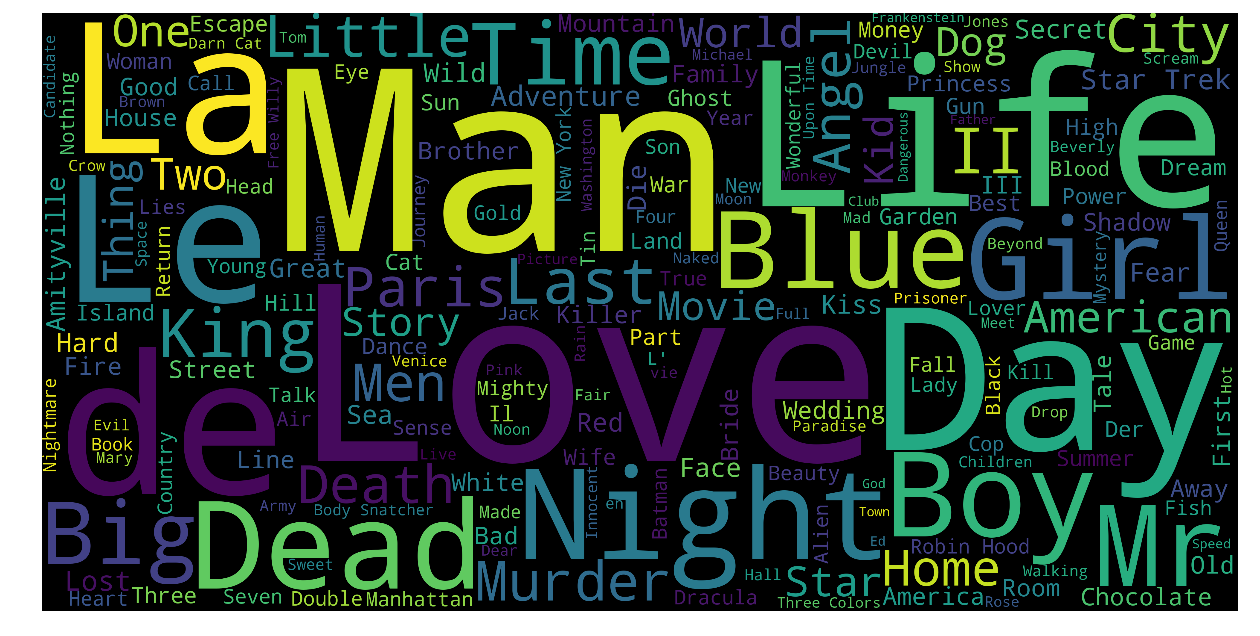

In [25]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS

movies['movie_title'] = movies['movie_title'].fillna('')
title_corpus = ' '.join(movies['movie_title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(title_corpus)

plt.figure(figsize=(20, 10))
plt.imshow(title_wordcloud)
plt.axis('off')

**There are a lot of movies titled with the words *Love*, *Man*, *Life*, *Day*, *Night*, *Dead*, etc.**

## Word Cloud of Movie Genres

**Which genres are the most popular?**

In [26]:
genre_count = movies.ix[:, 5:24].sum().reset_index(name='count')

In [27]:
genre_list =[]
for i in range(19):
    genre_list.append([genre_count['index'][i], genre_count['count'][i]])
genre_list

[['unknown', 2],
 ['action', 251],
 ['adventure', 135],
 ['animation', 42],
 ['childrens', 122],
 ['comedy', 505],
 ['crime', 109],
 ['documentary', 50],
 ['drama', 725],
 ['fantasy', 22],
 ['film_noir', 24],
 ['horror', 92],
 ['musical', 56],
 ['mystery', 61],
 ['romance', 247],
 ['sci_fi', 101],
 ['thriller', 251],
 ['war', 71],
 ['western', 27]]

In [28]:
genres = dict()
for s in genre_list:
    genres[s[0]] = s[1]

(-0.5, 3999.5, 1999.5, -0.5)

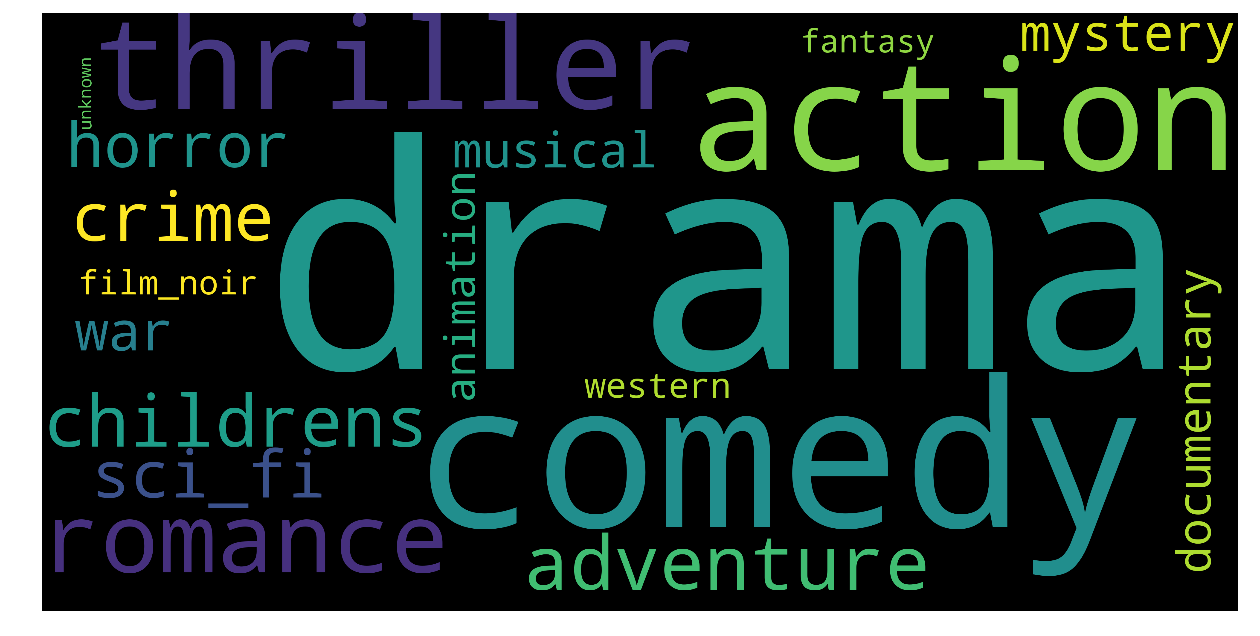

In [29]:
genre_wordcloud = WordCloud(background_color='black', height=2000, width=4000).generate_from_frequencies(frequencies=genres)

plt.figure(figsize=(20, 10))
plt.imshow(genre_wordcloud)
plt.axis('off')

**The genres *drama*, *comedy*, *thriller*, *action*, and *romance* are among the most popular.**

## Age

In [30]:
min_age = data['age'].min()
max_age = data['age'].max()
mean_age = data['age'].mean()

print('The smallest user is {} years old, and the oldest user is {} years old.'.format(min_age, max_age))
print('The average age of the users is {}.'.format(mean_age))

The smallest user is 7 years old, and the oldest user is 73 years old.
The average age of the users is 32.96985.


**Since the ages vary from 7 to 73 years old, we'll make the data granularity more coarse and assign users to age groups because peers and age are some factors that influence food, clothing, movie, etc. preferences.**

In [31]:
age_groups = []

for i in data['age']:
    if i <= 25:
        age_groups.append('0-25')
    if 25 < i <= 30:
        age_groups.append('26-30')
    if 30 < i <= 35:
        age_groups.append('31-35')
    if 35 < i <= 40:
        age_groups.append('36-40')
    if 40 < i <= 45:
        age_groups.append('41-45')
    if 45 < i <= 50:
        age_groups.append('46-50')
    if 50 < i <= 55:
        age_groups.append('51-55')
    if 55 < i <= 60:
        age_groups.append('56-60')
    if 60 < i <= 65:
        age_groups.append('61-65')
    if i > 65:
        age_groups.append('65+')
        
data['age_group'] = age_groups

In [32]:
age_grps = data.groupby('age_group').agg({'age': {'num_users': 'count'}, 'rating': {'avg_rating': 'mean'}})
age_grps.columns = age_grps.columns.droplevel(0)
age_grps = age_grps.reset_index()
age_grps

,age_group,avg_rating,num_users
0,0-25,3.483150,30564
1,26-30,3.447106,20957
2,31-35,3.574980,13837
3,36-40,3.571040,9938
4,41-45,3.581070,7216
5,46-50,3.567870,8030
6,51-55,3.719114,4468
7,56-60,3.658904,3779
8,61-65,3.655693,729
9,65+,3.589212,482


(3.4, 3.8)

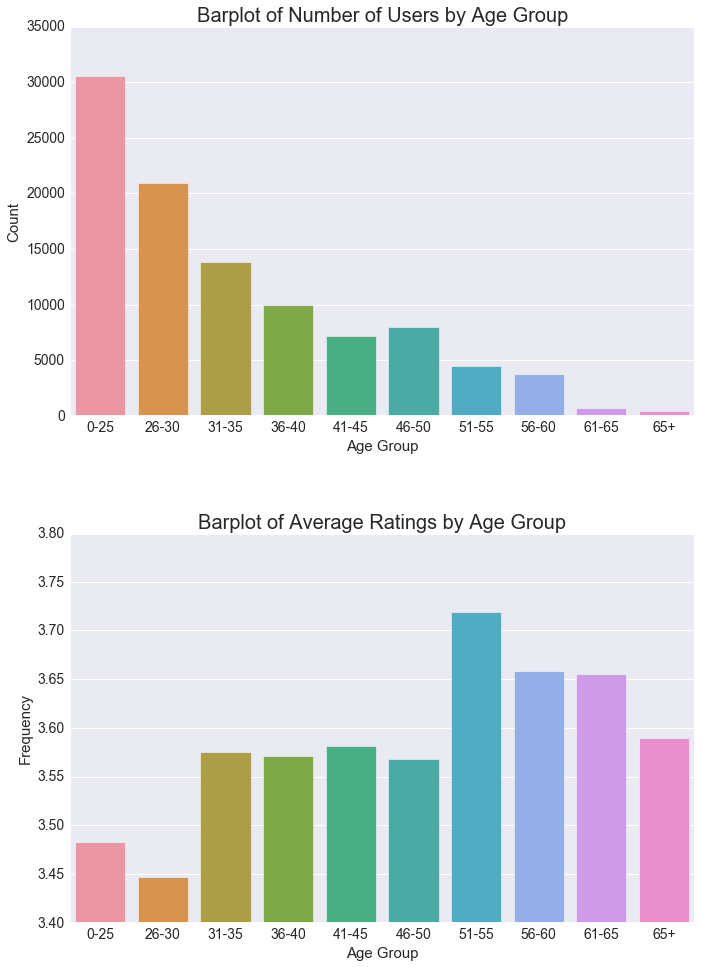

In [33]:
sns.set_style('darkgrid')
f, ax = plt.subplots(2, 1, figsize=(10, 15))
plt.subplots_adjust(hspace=0.3)

ax1 = sns.barplot(age_grps['age_group'], age_grps['num_users'], ax=ax[0])
ax1.set_title('Barplot of Number of Users by Age Group', fontsize=20)
ax1.set_xlabel('Age Group', fontsize=15)
ax1.set_ylabel('Count', fontsize=15)

ax2 = sns.barplot(age_grps['age_group'], age_grps['avg_rating'], ax=ax[1])
ax2.set_title('Barplot of Average Ratings by Age Group', fontsize=20)
ax2.set_xlabel('Age Group', fontsize=15)
ax2.set_ylabel('Frequency', fontsize=15)
ax2.set_ylim(3.4, 3.8)

**For the most part, the number of users who watched and rated movies on MovieLens decreases as age increases. Users in the age groups 0-25 and 26-30 combined contributed to more than half of the total number of movie ratings. The first two age groups are also the most strict with their standards for movies as seen by the comparatively lower average movie rating. This may also be because these users also watch and review more movies, resulting in an average rating closer to the population mean of 3 according to the Central Limit Theorem. On the other hand the age groups consisting of users of ages 51 and over are relatively more lenient with their movie ratings. This may be because of the reverse. Less ratings means a few high ratings can greatly influence the mean rating for that age group.**

## Gender

In [34]:
gender = data.groupby('sex').agg({'sex': {'num_users': 'count'}, 'rating': {'avg_rating': 'mean'}})
gender.columns = gender.columns.droplevel(0)
gender = gender.reset_index()
gender

,sex,avg_rating,num_users
0,F,3.531507,25740
1,M,3.529289,74260


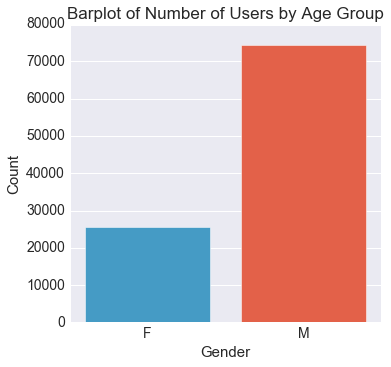

In [35]:
sns.set_style('darkgrid')
plt.figure(figsize=(5, 5))

ax1 = sns.barplot(gender['sex'], gender['num_users'])
plt.title('Barplot of Number of Users by Age Group', fontsize=17)
plt.xlabel('Gender', fontsize=15)
plt.ylabel('Count', fontsize=15)

**The MovieLens female population is only about 1/3 of the male population. Both genders average a movie rating of about 3.5.**

## Occupation


In [36]:
job_counts = data.groupby('occupation')['occupation'].count().reset_index(name='count')
job_counts.head()

,occupation,count
0,administrator,7479
1,artist,2308
2,doctor,540
3,educator,9442
4,engineer,8175


In [37]:
job = data.groupby('occupation').agg({'age': {'num_users': 'count'}, 'rating': {'avg_rating': 'mean'}})
job.columns = job.columns.droplevel(0)
job = job.reset_index()
job.head()

,occupation,avg_rating,num_users
0,administrator,3.635646,7479
1,artist,3.653380,2308
2,doctor,3.688889,540
3,educator,3.670621,9442
4,engineer,3.541407,8175


(2.8, 3.8)

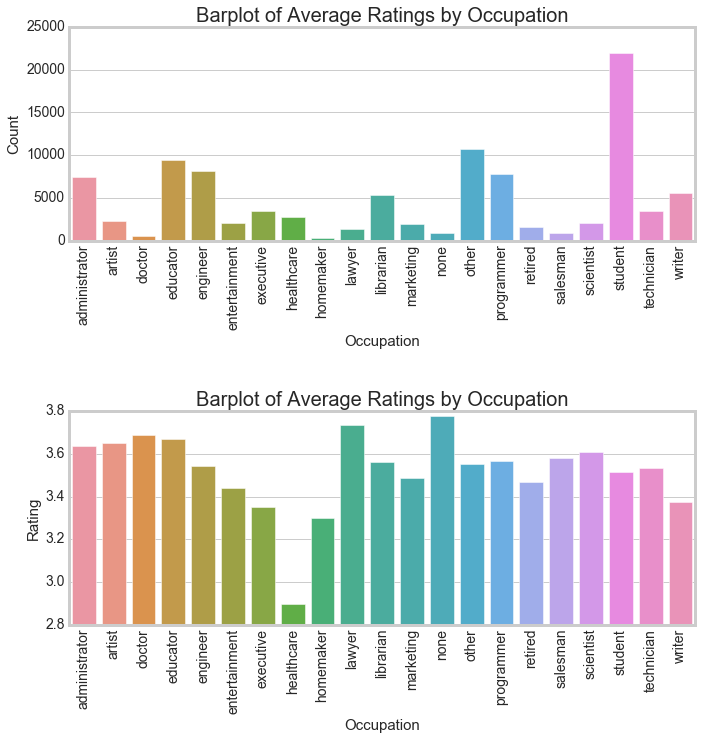

In [38]:
sns.set_style('whitegrid')
f, ax = plt.subplots(2, 1, figsize=(10, 10))
plt.subplots_adjust(hspace=0.8)
plt.xticks(rotation=90)

ax1 = sns.barplot(job['occupation'], job['num_users'], ax=ax[0])
ax1.set_title('Barplot of Average Ratings by Occupation', fontsize=20)
ax1.set_xlabel('Occupation', fontsize=15)
ax1.set_ylabel('Count', fontsize=15)
ax1.set_xticklabels(job['occupation'], rotation=90)

ax2 = sns.barplot(job['occupation'], job['avg_rating'], ax=ax[1])
ax2.set_title('Barplot of Average Ratings by Occupation', fontsize=20)
ax2.set_xlabel('Occupation', fontsize=15)
ax2.set_ylabel('Rating', fontsize=15)
ax2.set_ylim(2.8, 3.8)

**Students watched and rated the most movies on MovieLens, which aligns with our finding that a majority of users are aged 0-30. Homemakers, doctors, salesmen and none (possibly unemployed people) are the people who reviewed the least number of movies, most likely because these occupations are really time-consuming and do not allot leisure time for movie watching.**

**When observing the barplot of average ratings by occupation, people working in "healthcare" give the lowest average rating of ~2.9 on a scale of 1 to 5. This average rating is well below the population average of 3 and the actual average of 3.5. People working in "healthcare" reviewed a fairly small number of movies with the lowest average rating among all occupation groups, which signfies that the average person in this group has very high standards for movies and/or is very strict on giving high ratings.**

## Zipcode


In [39]:
zipcode_count = data.groupby('zip_code')['zip_code'].count().reset_index(name='count')
zipcode_count.head()

,zip_code,count
0,00000,129
1,01002,22
2,01040,22
3,01080,21
4,01331,21


In [40]:
zipcode = data.groupby('zip_code').agg({'age': {'num_users': 'count'}, 'rating': {'avg_rating': 'mean'}})
zipcode.columns = zipcode.columns.droplevel(0)
zipcode = zipcode.reset_index()
zipcode

,zip_code,avg_rating,num_users
0,00000,3.705426,129
1,01002,4.272727,22
2,01040,3.772727,22
3,01080,3.666667,21
4,01331,3.285714,21
5,01375,4.118280,93
6,01581,4.031496,127
7,01602,3.831683,101
8,01701,3.300000,20
9,01720,3.530612,98


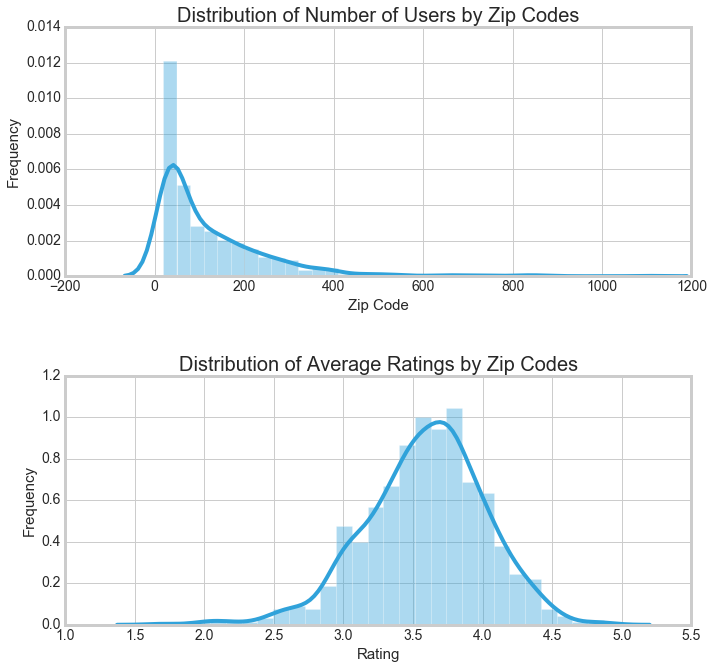

In [41]:
sns.set_style('whitegrid')
f, ax = plt.subplots(2, 1, figsize=(10, 10))
plt.subplots_adjust(hspace=0.4)

ax1 = sns.distplot(zipcode['num_users'], ax=ax[0])
ax1.set_title('Distribution of Number of Users by Zip Codes', fontsize=20)
ax1.set_xlabel('Zip Code', fontsize=15)
ax1.set_ylabel('Frequency', fontsize=15)

ax2 = sns.distplot(zipcode['avg_rating'], ax=ax[1])
ax2.set_title('Distribution of Average Ratings by Zip Codes', fontsize=20)
ax2.set_xlabel('Rating', fontsize=15)
ax2.set_ylabel('Frequency', fontsize=15)

**The distribution of average movie ratings by zip codes is roughly bell-shaped with a mean at around 3.7.**